In [23]:
!pip install netCDF4
!pip install cartopy
!pip install cmocean

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
import netCDF4 as nc
import imageio
import cmocean

In [25]:
ds = nc.Dataset('./Aug1.nc')

# filepaths = ['./Aug1.nc', './Aug10.nc', './Aug20.nc']
# dates = ['01-Aug-2023', '10-Aug-2023', '20-Aug-2023']
filepaths = ['./Aug1.nc', './Aug10.nc', './Aug20.nc', './Sep1.nc', './Sep10.nc', './Sep20.nc', './Oct1.nc', './Oct10.nc', './Oct20.nc', './Oct30.nc']
dates = ['01-Aug-2022', '10-Aug-2022', '20-Aug-2022', '01-Sep-2022', '10-Sep-2022', '20-Sep-2022', '1-Oct-2022', '10-Oct-2022', '20-Oct-2022', '30-Oct-2022']

In [26]:
global_max = -1e10;
global_min = 1e10;
for files in filepaths:
	temp = nc.Dataset(files)
	arr = np.sort(np.unique(temp['SST'][0].data))
	global_max = max(global_max, arr[-1])
	global_min = min(global_min, arr[1])
	print("min, max = ", arr[1], arr[-1])

print("Global min, Global max = ", global_min, global_max)

min, max =  -2.0 33.961002
min, max =  -2.0 33.97
min, max =  -2.0 34.0
min, max =  -2.0 33.97375
min, max =  -2.0 33.984
min, max =  -2.0 33.983334
min, max =  -2.0 33.857567
min, max =  -2.0 33.959
min, max =  -2.0 33.665
min, max =  -1.891201 33.976
Global min, Global max =  -2.0 34.0


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


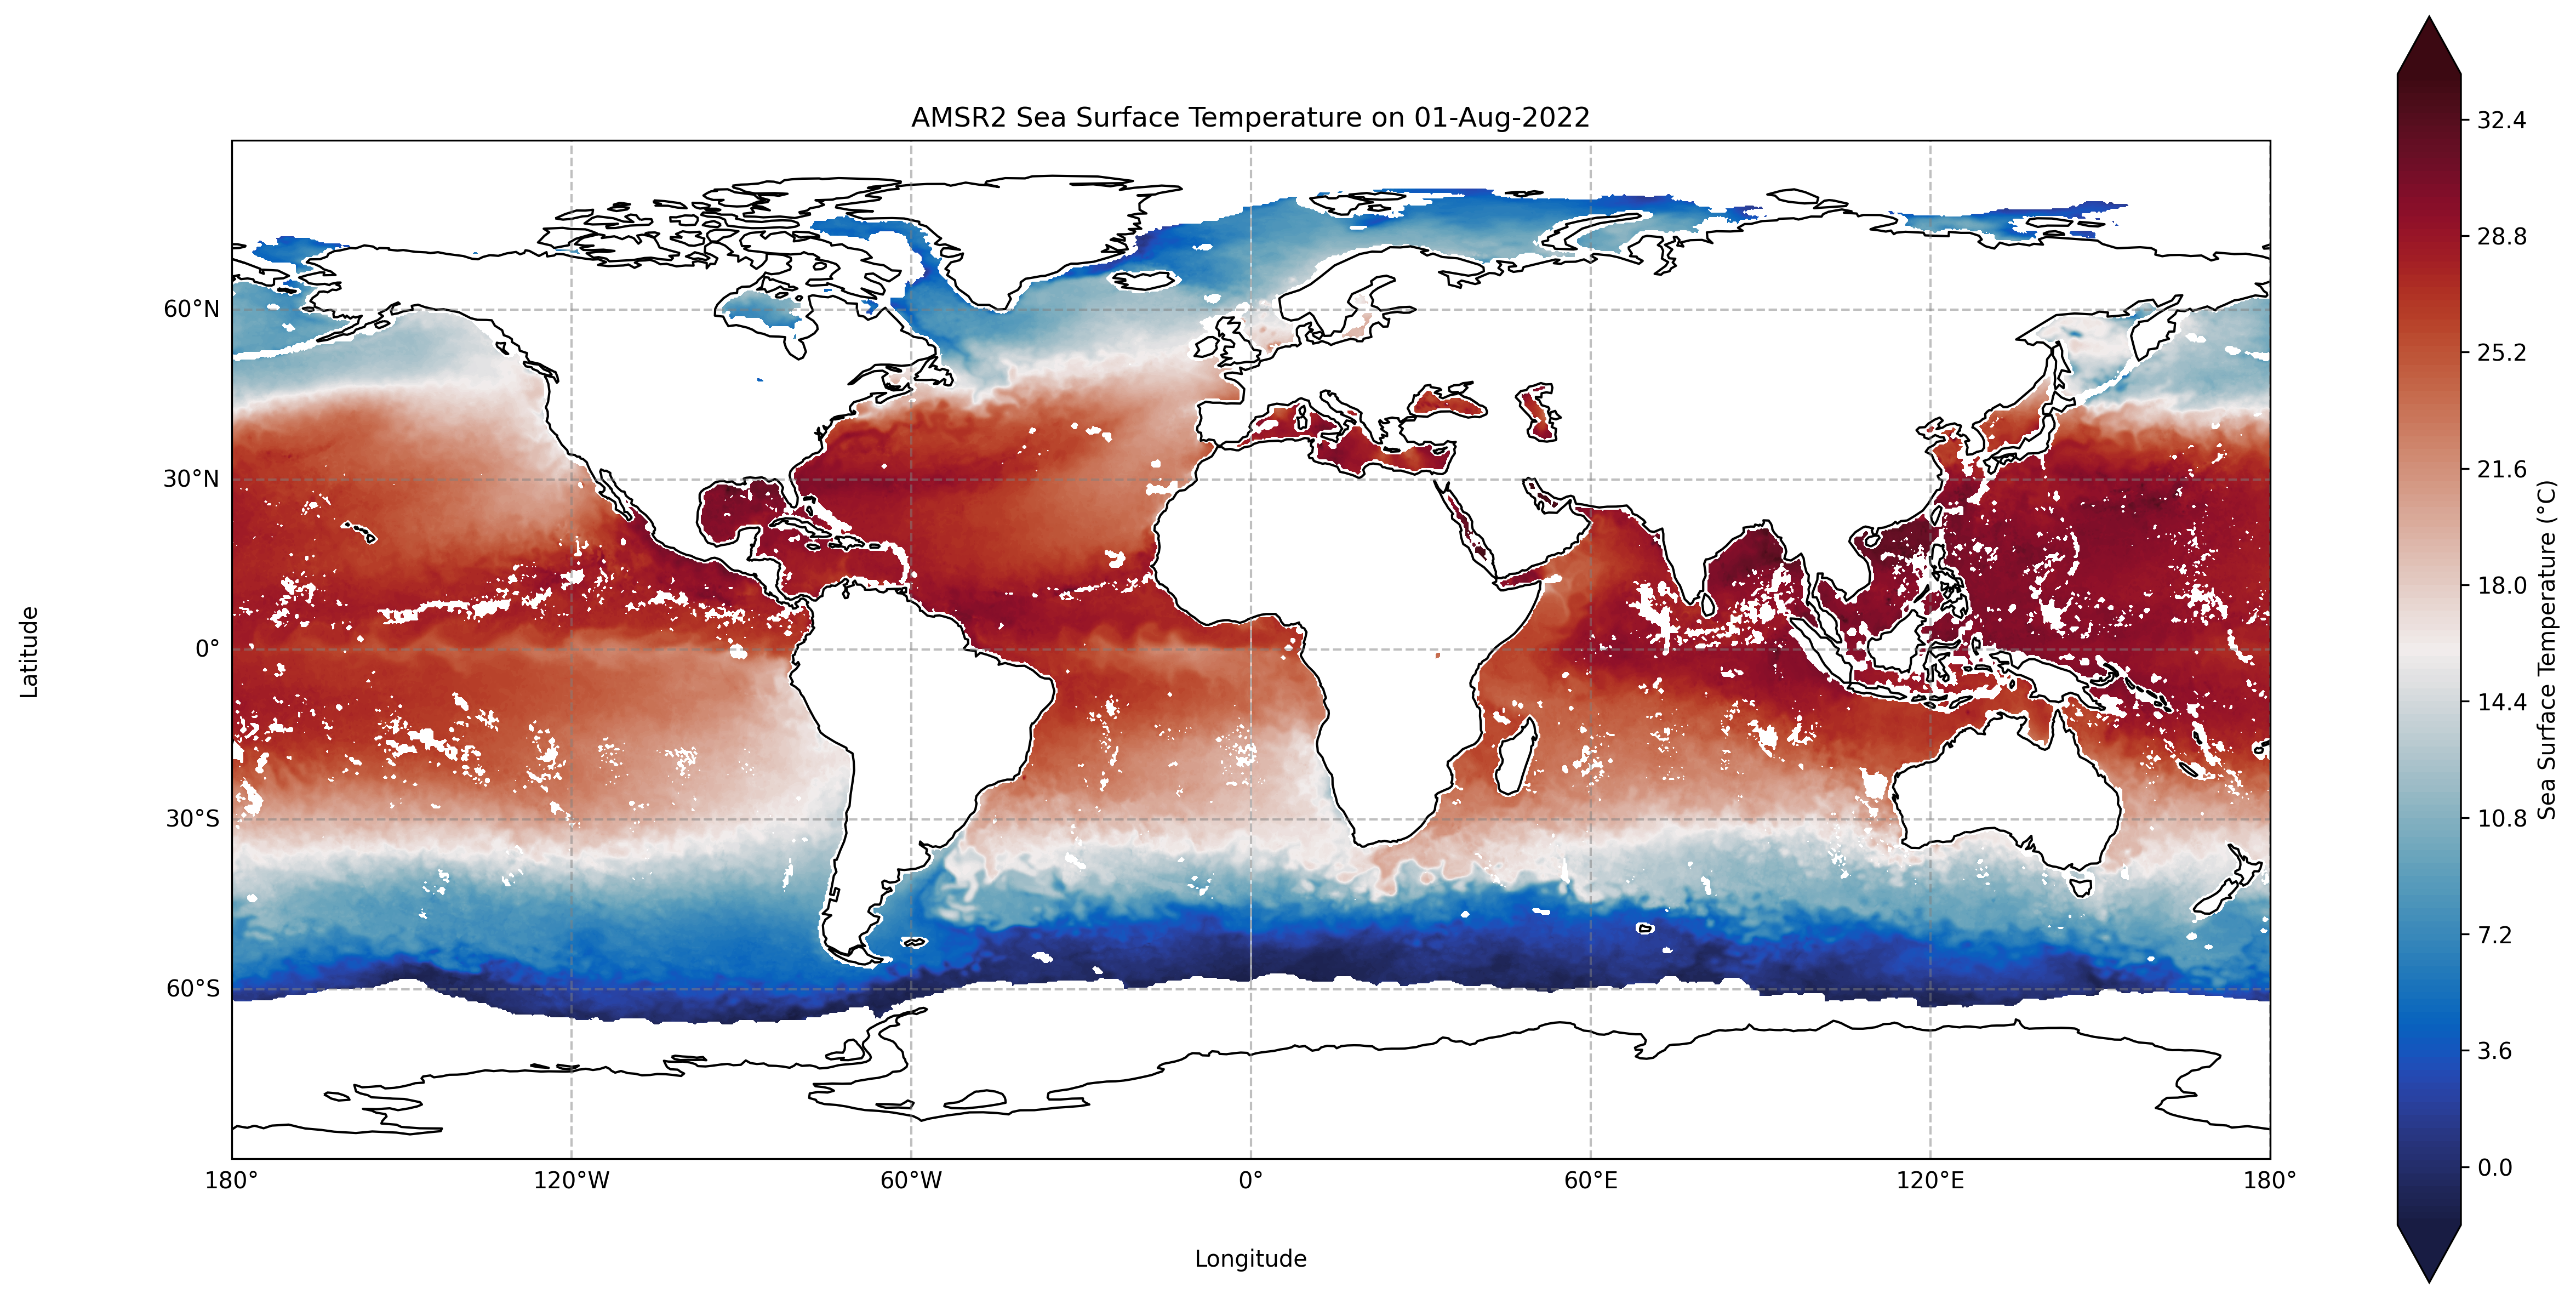

In [29]:
def create_contour(filepath, date):
    # Extract latitude and longitude values from the dataset
    ds = nc.Dataset(filepath)
    lats = ds['lat'][:]
    lons = ds['lon'][:]

    # Create a figure and axes object with a PlateCarree projection
    fig, ax = plt.subplots(figsize=(20, 10), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot the SST contours
    contour = ax.contourf(lons, lats, ds['SST'][0, :, :], levels=200, cmap=cmocean.cm.balance, extend='both', alpha=1)

    # Add black contour lines on top
    # contour_lines = plt.contour(lons, lats, ds['SST'][0, :, :], levels=10, colors='black', linewidths=0.6, alpha=0.5)

    # Add a colorbar
    cbar = plt.colorbar(contour, ax=ax, label='Sea Surface Temperature (°C)')

    # Add coastlines
    ax.coastlines()

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    # Label x-axis and y-axis
    gl.xlabels_top = gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
    gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()

    # # Customize axis labels and title
    # ax.set_xlabel('Longitude')
    # ax.set_ylabel('Latitude')
    # ax.set_title('AMSR2 Sea Surface Temperature on ' + date)

    # Customize axis labels and title
    ax.text(0.5, -0.1, 'Longitude', va='center', ha='center', transform=ax.transAxes)
    ax.text(-0.1, 0.5, 'Latitude', va='center', ha='center', rotation='vertical', transform=ax.transAxes)
    ax.set_title('AMSR2 Sea Surface Temperature on ' + date)

    # Display the plot
    plt.show()
    # plt.savefig(f'SST_{date}_hot_colormap.png', bbox_inches='tight')
    plt.close(fig)

create_contour("./Aug1.nc", '01-Aug-2022')

In [30]:
filepaths = ['./Aug1.nc', './Aug10.nc', './Aug20.nc', './Sep1.nc', './Sep10.nc', './Sep20.nc', './Oct1.nc', './Oct10.nc', './Oct20.nc', './Oct30.nc']
dates = ['01-Aug-2022', '10-Aug-2022', '20-Aug-2022', '01-Sep-2022', '10-Sep-2022', '20-Sep-2022', '1-Oct-2022', '10-Oct-2022', '20-Oct-2022', '30-Oct-2022']

In [31]:
# images = []
# for filepath, date in zip(filepaths, dates):
#     create_contour(filepath, date)
#     images.append(imageio.imread(f'./plots_10/SST_{date}_10levels.png'))

# # Save the GIF
# imageio.mimsave('./plots_10/SST_GIF_10levels.gif', images, duration=1, loop=0, fps=1)

In [32]:
# !zip -r ./10levels /content/plots_10